# 🔹 Seção 5.1 – Parte 1: Preparação e Dataset

**Objetivo:** Preparar o ambiente e carregar o dataset 20 Newsgroups para análise de embeddings e clustering.

## 📋 Conteúdo deste Notebook

1. **Introdução aos Embeddings**: Conceitos fundamentais e evolução histórica
2. **Configuração do Ambiente**: Carregamento de variáveis e dependências
3. **Sistema de Cache Elasticsearch**: Inicialização e verificação
4. **Dataset 20 Newsgroups**: Carregamento e preparação
5. **Salvamento no Elasticsearch**: Armazenamento com IDs únicos
6. **Análise Exploratória**: Estatísticas detalhadas e visualizações

## 🔗 Sequência dos Notebooks

- **Notebook 1** (atual): Preparação e Dataset ✅
- **Notebook 2**: Embeddings Locais (TF-IDF, Word2Vec, BERT, Sentence-BERT)
- **Notebook 3**: Embeddings OpenAI
- **Notebook 4**: Análise Comparativa dos Embeddings
- **Notebook 5**: Clustering e Machine Learning


## 🗑️ LIMPEZA DO ELASTICSEARCH (Execute APENAS se necessário)

### ⚠️ **ATENÇÃO: Leia antes de executar!**

Esta seção permite **LIMPAR COMPLETAMENTE** o cache do Elasticsearch, deletando:
- 🗑️ Todo o dataset salvo (`documents_dataset`)
- 🗑️ Todos os embeddings gerados (TF-IDF, Word2Vec, BERT, Sentence-BERT, OpenAI)
- 🗑️ **TODOS** os dados processados

### 🎯 **Quando usar esta limpeza?**

Execute a célula abaixo APENAS se:
1. ✅ **Primeira execução completa**: Para processar o dataset completo (20 classes, ~18k docs)
2. ✅ **Dados duplicados detectados**: Se você viu mensagens de "9.558 docs" ou dados inconsistentes
3. ✅ **Mudou as configurações**: Alterou DATASET_SIZE, TEXT_MIN_LENGTH ou outras configs importantes
4. ✅ **Dados corrompidos**: Se detectou problemas de integridade nos dados
5. ✅ **Reprocessamento total**: Quer começar do zero com tudo limpo

### ❌ **Quando NÃO usar:**

NÃO execute se:
- ❌ Já processou tudo e os dados estão corretos
- ❌ Só quer executar análises (Notebooks 2-5)
- ❌ Tem dúvidas - procure ajuda primeiro

### 📊 **Estado Atual do Cache**

Antes de limpar, execute a célula de "STATUS DO CACHE" (mais abaixo) para ver o que existe atualmente no Elasticsearch.

### 💰 **Impacto da Limpeza**

Após limpar, você precisará:
- ⏱️ **Notebook 1**: ~5-10 min (carregar e salvar dataset)
- ⏱️ **Notebook 2**: ~10-30 min (gerar TF-IDF, Word2Vec, BERT, Sentence-BERT)
- ⏱️ **Notebook 3**: ~30-60 min + **$0.50-$2.00** (gerar embeddings OpenAI - **CUSTO REAL!**)
- ⏱️ **Notebooks 4-5**: ~5-10 min (análises)

**Total:** ~1-2 horas + **custos da API OpenAI**

### 🚀 **Instruções de Uso**

1. **Leia TUDO acima** para ter certeza que quer limpar
2. **Vá para a próxima célula** (célula de código logo abaixo)
3. **Descomente** a linha que começa com `# clear_elasticsearch_cache()`
4. **Execute a célula** (Shift + Enter)
5. **Aguarde** a confirmação de que tudo foi deletado
6. **Comente novamente** a linha (para evitar limpezas acidentais)
7. **Continue** executando o resto do notebook normalmente


In [17]:
"""
🗑️ CÉLULA DE LIMPEZA DO ELASTICSEARCH
=====================================

⚠️ ESTA CÉLULA ESTÁ COMENTADA POR SEGURANÇA!

Para limpar o Elasticsearch:
1. Descomente a linha abaixo que começa com # clear...
2. Execute esta célula (Shift + Enter)
3. Aguarde a mensagem de confirmação
4. Comente novamente a linha (para segurança)

IMPORTANTE: Esta operação é IRREVERSÍVEL!
Você perderá todos os dados e precisará reprocessar tudo.
"""

# ========================================================================
# ✅ ATIVAR LIMPEZA: DESCOMENTE TODO O BLOCO ABAIXO
# ========================================================================
# import os
# from pathlib import Path
# from dotenv import load_dotenv

# # Carregar variáveis de ambiente
# env_paths = [
#     Path.cwd() / 'setup' / '.env',
#     Path.cwd() / '.env',
#     Path.cwd() / 'setup' / 'config_example.env'
# ]
# for env_path in env_paths:
#     if env_path.exists():
#         load_dotenv(env_path)
#         break

# # Importar e inicializar Elasticsearch
# from elasticsearch_manager import init_elasticsearch_cache, clear_elasticsearch_cache

# ELASTICSEARCH_HOST = os.getenv('ELASTICSEARCH_HOST', 'localhost')
# ELASTICSEARCH_PORT = int(os.getenv('ELASTICSEARCH_PORT', 9200))

# print("🔌 Conectando ao Elasticsearch...")
# connected = init_elasticsearch_cache(host=ELASTICSEARCH_HOST, port=ELASTICSEARCH_PORT)

# if connected:
#     print("✅ Conectado!")
#     print("")
#     print("🗑️ LIMPANDO ELASTICSEARCH...")
#     print("=" * 60)
#     clear_elasticsearch_cache()
#     print("")
#     print("✅ LIMPEZA CONCLUÍDA!")
#     print("💡 Agora execute o resto do notebook para recriar os dados")
# else:
#     print("❌ Não foi possível conectar ao Elasticsearch")
#     print("💡 Verifique se o Docker está rodando: docker-compose up -d")
# ========================================================================

print("ℹ️  Célula de LIMPEZA está INATIVA (comentada)")
print("📍 Local: INÍCIO do Notebook 1 - Seção5.1_Part1_Preparacao_Dataset.ipynb")
print("")
print("🔒 Para ATIVAR a limpeza:")
print("   1. Descomente TODO O BLOCO acima (todas as linhas que começam com #)")
print("   2. Execute esta célula (Shift + Enter)")
print("   3. Aguarde a confirmação de limpeza")
print("")
print("⚠️  ATENÇÃO: Isso deletará TUDO do Elasticsearch!")
print("   - Dataset completo (~18k docs)")
print("   - Todos os embeddings (TF-IDF, Word2Vec, BERT, SBERT, OpenAI)")
print("   - TODOS os dados processados")
print("")
print("💡 Esta célula é AUTOCONTIDA - funciona independentemente!")
print("💡 Não precisa executar outras células antes desta")


ℹ️  Célula de LIMPEZA está INATIVA (comentada)
📍 Local: INÍCIO do Notebook 1 - Seção5.1_Part1_Preparacao_Dataset.ipynb

🔒 Para ATIVAR a limpeza:
   1. Descomente TODO O BLOCO acima (todas as linhas que começam com #)
   2. Execute esta célula (Shift + Enter)
   3. Aguarde a confirmação de limpeza

⚠️  ATENÇÃO: Isso deletará TUDO do Elasticsearch!
   - Dataset completo (~18k docs)
   - Todos os embeddings (TF-IDF, Word2Vec, BERT, SBERT, OpenAI)
   - TODOS os dados processados

💡 Esta célula é AUTOCONTIDA - funciona independentemente!
💡 Não precisa executar outras células antes desta


---

## 📚 Início do Notebook Principal

A partir daqui, o notebook segue sua sequência normal. A célula de limpeza acima só deve ser usada quando necessário.

---


## 🧠 Conceitos Fundamentais: A Evolução dos Embeddings

### **O que são Embeddings?**

**Embeddings** são representações vetoriais densas que mapeiam textos para um espaço onde **proximidade geométrica ≈ similaridade semântica**. Diferente de representações esparsas (BoW/TF-IDF), embeddings capturam **contexto** e **relações semânticas**.

### **Evolução Histórica**

1. **TF-IDF (1970s)**: Método clássico baseado em frequência de termos
   - **Vantagens**: Simples, interpretável, eficiente
   - **Limitações**: Não captura contexto semântico

2. **Word2Vec (2013)**: Primeira revolução - palavras similares ficam próximas
   - **Vantagens**: Captura similaridade semântica
   - **Limitações**: Palavras isoladas, sem contexto da sentença

3. **BERT (2018)**: Contextualização bidirecional - mesma palavra, contextos diferentes
   - **Vantagens**: Entende contexto completo da sentença
   - **Limitações**: Computacionalmente caro

4. **Sentence-BERT (2019)**: Otimizado para similaridade de sentenças
   - **Vantagens**: Rápido e eficiente para clustering
   - **Limitações**: Modelos menores têm menos capacidade

5. **OpenAI Embeddings (2020+)**: Modelos de última geração
   - **Vantagens**: Máxima qualidade em benchmarks
   - **Limitações**: Requer API paga, dependência externa

### **Por que Embeddings são Ideais para Clustering?**

- **Proximidade semântica** = proximidade geométrica no espaço vetorial
- **Densidade**: Informação rica em poucas dimensões
- **Contextualização**: Captura nuances semânticas
- **Transfer Learning**: Aproveita conhecimento pré-treinado

### **Aplicações Práticas**

- **Clustering semântico**: Agrupar documentos por tópico
- **Busca semântica**: Encontrar documentos similares
- **Detecção de anomalias**: Identificar textos atípicos
- **Sistemas de recomendação**: Sugerir conteúdo similar


## ⚙️ Configuração do Ambiente

### **Carregamento de Variáveis de Ambiente**

Este notebook utiliza o arquivo `setup/.env` para carregar todas as configurações. Isso permite:

- **Flexibilidade**: Alterar configurações sem modificar código
- **Segurança**: Chaves API não ficam expostas no código
- **Consistência**: Mesmas configurações em todos os notebooks

### **Variáveis Principais**

- `OPENAI_API_KEY`: Chave da API OpenAI (usado no Notebook 3)
- `ELASTICSEARCH_HOST` e `ELASTICSEARCH_PORT`: Configuração do Elasticsearch
- `USE_ELASTICSEARCH_CACHE`: Se deve usar cache inteligente
- `FORCE_REGENERATE_EMBEDDINGS`: Se deve forçar regeneração
- `DATASET_SIZE`: Tamanho máximo do dataset
- `TEXT_MIN_LENGTH`: Tamanho mínimo dos textos
- `CLUSTERING_RANDOM_STATE`: Seed para reproducibilidade


In [18]:
# 🔧 Configuração de Variáveis de Ambiente
# Esta célula carrega as configurações do arquivo setup/.env

import os
from pathlib import Path

# Tentar carregar python-dotenv se disponível
try:
    from dotenv import load_dotenv
    print("✅ python-dotenv disponível")
    
    # Procurar arquivo .env em diferentes locais (em ordem de prioridade)
    env_paths = [
        Path.cwd() / 'setup' / '.env',  # Primeiro: pasta setup/
        Path.cwd() / '.env',            # Segundo: diretório raiz
        Path.cwd() / 'setup' / 'config_example.env'  # Terceiro: arquivo de exemplo
    ]
    
    env_loaded = False
    for env_path in env_paths:
        if env_path.exists():
            load_dotenv(env_path)
            print(f"✅ Arquivo .env carregado: {env_path}")
            env_loaded = True
            break
    
    if not env_loaded:
        print("⚠️  Nenhum arquivo .env encontrado, usando variáveis do sistema")
        
except ImportError:
    print("⚠️  python-dotenv não instalado, usando variáveis do sistema")
    print("💡 Para instalar: uv pip install python-dotenv")

# Carregar configurações do .env
MAX_CHARS_PER_REQUEST = int(os.getenv('MAX_CHARS_PER_REQUEST', 32000))
BATCH_SIZE_SMALL_TEXTS = int(os.getenv('BATCH_SIZE_SMALL_TEXTS', 4))
BATCH_SIZE_MEDIUM_TEXTS = int(os.getenv('BATCH_SIZE_MEDIUM_TEXTS', 2))
BATCH_SIZE_LARGE_TEXTS = int(os.getenv('BATCH_SIZE_LARGE_TEXTS', 1))
DATASET_SIZE = int(os.getenv('DATASET_SIZE', 20000))
TEXT_MIN_LENGTH = int(os.getenv('TEXT_MIN_LENGTH', 20))
MAX_CLUSTERS = int(os.getenv('MAX_CLUSTERS', 20))
CLUSTERING_RANDOM_STATE = int(os.getenv('CLUSTERING_RANDOM_STATE', 42))
PLOT_WIDTH = int(os.getenv('PLOT_WIDTH', 800))
PLOT_HEIGHT = int(os.getenv('PLOT_HEIGHT', 600))
LOG_LEVEL = os.getenv('LOG_LEVEL', 'INFO')
SAVE_MODELS = os.getenv('SAVE_MODELS', 'true').lower() == 'true'
SAVE_RESULTS = os.getenv('SAVE_RESULTS', 'true').lower() == 'true'
ELASTICSEARCH_HOST = os.getenv('ELASTICSEARCH_HOST', 'localhost')
ELASTICSEARCH_PORT = int(os.getenv('ELASTICSEARCH_PORT', 9200))

# Verificar se a chave da OpenAI está configurada (será usada no Notebook 3)
openai_key = os.getenv('OPENAI_API_KEY')
if openai_key and openai_key != 'sk-your-openai-key-here':
    print("✅ Chave da OpenAI configurada")
    OPENAI_AVAILABLE = True
else:
    print("⚠️  Chave da OpenAI não configurada")
    print("💡 Configure OPENAI_API_KEY no arquivo setup/.env para usar embeddings da OpenAI")
    OPENAI_AVAILABLE = False

print(f"\n🔧 Configuração carregada com sucesso!")
print(f"📊 Configurações carregadas:")
print(f"   ELASTICSEARCH_HOST: {ELASTICSEARCH_HOST}")
print(f"   ELASTICSEARCH_PORT: {ELASTICSEARCH_PORT}")
print(f"   DATASET_SIZE: {DATASET_SIZE}")
print(f"   TEXT_MIN_LENGTH: {TEXT_MIN_LENGTH}")
print(f"   MAX_CLUSTERS: {MAX_CLUSTERS}")
print(f"   CLUSTERING_RANDOM_STATE: {CLUSTERING_RANDOM_STATE}")


✅ python-dotenv disponível
✅ Arquivo .env carregado: /Users/ivanvarella/Documents/Dados/9 - Mestrado/1 - Disciplinas 2025/2025.2/PPGEP9002 - INTELIGÊNCIA COMPUTACIONAL PARA ENGENHARIA DE PRODUÇÃO - T01/1 - Extra - Professor/Projetos/Embeddings_5.1/setup/.env
✅ Chave da OpenAI configurada

🔧 Configuração carregada com sucesso!
📊 Configurações carregadas:
   ELASTICSEARCH_HOST: localhost
   ELASTICSEARCH_PORT: 9200
   DATASET_SIZE: 20000
   TEXT_MIN_LENGTH: 20
   MAX_CLUSTERS: 20
   CLUSTERING_RANDOM_STATE: 42


## 📚 Imports e Dependências

### **Bibliotecas Utilizadas**

- **NumPy e Pandas**: Manipulação de dados e arrays
- **Matplotlib e Seaborn**: Visualização de dados
- **Scikit-learn**: Dataset e métricas
- **Elasticsearch**: Sistema de cache inteligente


In [19]:
# 🚀 Imports Essenciais
print("🚀 CARREGANDO IMPORTS ESSENCIAIS")
print("=" * 40)

# Imports básicos
import re
import json
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from typing import List, Dict, Tuple, Optional

print("✅ Imports básicos carregados")

# Scikit-learn para dataset
from sklearn.datasets import fetch_20newsgroups

print("✅ Scikit-learn carregado")

# Configurações
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 200)

# Configuração do matplotlib
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✅ Configurações aplicadas")

print("\n🎉 IMPORTS ESSENCIAIS CONCLUÍDOS!")


🚀 CARREGANDO IMPORTS ESSENCIAIS
✅ Imports básicos carregados
✅ Scikit-learn carregado
✅ Configurações aplicadas

🎉 IMPORTS ESSENCIAIS CONCLUÍDOS!


## 🗄️ Sistema de Cache Elasticsearch

### **Por que usar Elasticsearch como Cache?**

O sistema de cache inteligente oferece:

- **Evita reprocessamento**: Detecta embeddings já gerados e os reutiliza
- **Valida integridade**: Verifica se os dados salvos estão corretos via hash MD5
- **Economiza tempo**: TF-IDF (30s → 5s), Word2Vec (60s → 5s), BERT (120s → 5s), **OpenAI (30min → 5s!)**
- **Economiza dinheiro**: Evita chamadas desnecessárias à API da OpenAI (~$0.50 por execução)
- **Rastreabilidade**: Cada embedding está vinculado ao documento original

### **Estrutura dos Índices**

```
📦 ELASTICSEARCH CACHE
├── 📄 documents_dataset     (Dataset original com IDs únicos)
├── 🧮 embeddings_tfidf      (até 5000 dimensões)
├── 🧮 embeddings_word2vec   (100 dimensões)  
├── 🧮 embeddings_bert       (768 dimensões)
├── 🧮 embeddings_sbert      (384 dimensões)
└── 🧮 embeddings_openai     (1536 dimensões)
```

### **Fluxo Inteligente**

1. **Verificação**: Checa se embeddings já existem
2. **Validação**: Confere integridade via hash dos textos
3. **Geração seletiva**: Gera apenas embeddings faltantes ou inválidos
4. **Salvamento**: Armazena com metadata completa


In [20]:
# 📚 Carregar Bibliotecas Opcionais
print("📚 CARREGANDO BIBLIOTECAS OPCIONAIS")
print("=" * 40)

# Elasticsearch
try:
    from elasticsearch import Elasticsearch
    ELASTICSEARCH_AVAILABLE = True
    print("✅ Elasticsearch carregado")
except ImportError:
    ELASTICSEARCH_AVAILABLE = False
    print('⚠️ Elasticsearch não instalado')
    print('💡 Para instalar: uv pip install elasticsearch')

print(f"\n📊 STATUS DAS BIBLIOTECAS:")
print(f"   Elasticsearch: {'✅' if ELASTICSEARCH_AVAILABLE else '❌'}")


📚 CARREGANDO BIBLIOTECAS OPCIONAIS
✅ Elasticsearch carregado

📊 STATUS DAS BIBLIOTECAS:
   Elasticsearch: ✅


In [21]:
# 🗄️ Inicialização do Sistema de Cache Elasticsearch
print("🗄️ INICIALIZANDO SISTEMA DE CACHE ELASTICSEARCH")
print("=" * 60)

# Importar módulo de gerenciamento de cache
try:
    from elasticsearch_manager import (
        init_elasticsearch_cache, get_cache_status, save_dataset_to_cache,
        save_embeddings_to_cache, load_embeddings_from_cache, 
        check_embeddings_in_cache, clear_elasticsearch_cache
    )
    print("✅ Módulo de cache Elasticsearch carregado")
    CACHE_AVAILABLE = True
except ImportError as e:
    print(f"❌ Erro ao carregar módulo de cache: {e}")
    print("💡 Certifique-se de que o arquivo elasticsearch_manager.py está no diretório")
    CACHE_AVAILABLE = False

# Inicializar conexão com Elasticsearch
if CACHE_AVAILABLE:
    print("\n🔌 Conectando ao Elasticsearch...")
    cache_connected = init_elasticsearch_cache(
        host=ELASTICSEARCH_HOST,
        port=ELASTICSEARCH_PORT
    )
    
    if cache_connected:
        print("✅ Cache Elasticsearch inicializado com sucesso!")
        
        # Verificar status do cache
        print("\n📊 STATUS DO CACHE:")
        print("-" * 40)
        status = get_cache_status()
        
        if status.get("connected", False):
            print(f"🔌 Conexão: ✅ {status.get('host', 'N/A')}")
            print(f"📊 Índices encontrados: {len([k for k, v in status.get('indices', {}).items() if v.get('exists', False)])}")
            print(f"📋 Total de documentos: {status.get('total_docs', 0):,}")
            print(f"💾 Espaço usado: {status.get('total_size_mb', 0):.1f} MB")
            
            # Mostrar detalhes por índice
            print(f"\n📦 DETALHES DOS ÍNDICES:")
            for index_name, info in status.get('indices', {}).items():
                if info.get('exists', False):
                    print(f"   ✅ {index_name:<20}: {info.get('doc_count', 0):>6,} docs ({info.get('size_mb', 0):>6.1f} MB)")
                else:
                    print(f"   ⏳ {index_name:<20}: Será criado durante a geração")
            
            # Verificar se deve usar cache
            use_cache = os.getenv('USE_ELASTICSEARCH_CACHE', 'true').lower() == 'true'
            force_regenerate = os.getenv('FORCE_REGENERATE_EMBEDDINGS', 'false').lower() == 'true'
            
            print(f"\n🎛️ CONFIGURAÇÕES DO SISTEMA:")
            print(f"   Usar cache: {'✅' if use_cache else '❌'}")
            print(f"   Forçar regeneração: {'✅' if force_regenerate else '❌'}")
            
        else:
            print(f"❌ Erro no cache: {status.get('error', 'Desconhecido')}")
    else:
        print("❌ Falha ao conectar com Elasticsearch")
        print("💡 Verifique se o Docker está rodando: docker-compose up -d")
        CACHE_AVAILABLE = False
else:
    print("⚠️  Sistema de cache não disponível")
    print("💡 O notebook funcionará sem cache (mais lento)")

print(f"\n🎯 STATUS FINAL: {'✅ Cache ativo' if CACHE_AVAILABLE and cache_connected else '❌ Cache inativo'}")


🗄️ INICIALIZANDO SISTEMA DE CACHE ELASTICSEARCH
✅ Módulo de cache Elasticsearch carregado

🔌 Conectando ao Elasticsearch...
✅ Conectado ao Elasticsearch (localhost:9200)
✅ Cache Elasticsearch inicializado com sucesso!

📊 STATUS DO CACHE:
----------------------------------------
🔌 Conexão: ✅ localhost:9200
📊 Índices encontrados: 1
📋 Total de documentos: 18,211
💾 Espaço usado: 26.5 MB

📦 DETALHES DOS ÍNDICES:
   ✅ documents_dataset   : 18,211 docs (  26.5 MB)
   ⏳ embeddings_tfidf    : Será criado durante a geração
   ⏳ embeddings_word2vec : Será criado durante a geração
   ⏳ embeddings_bert     : Será criado durante a geração
   ⏳ embeddings_sbert    : Será criado durante a geração
   ⏳ embeddings_openai   : Será criado durante a geração
   ⏳ embeddings_test     : Será criado durante a geração
   ⏳ embeddings_duplicate_test: Será criado durante a geração
   ⏳ embeddings_integrity_test: Será criado durante a geração

🎛️ CONFIGURAÇÕES DO SISTEMA:
   Usar cache: ✅
   Forçar regeneração: ❌


## 📂 Dataset 20 Newsgroups

### **Por que 20 Newsgroups?**

O dataset **20 Newsgroups** é ideal para estudos de clustering porque:

- **Classes bem definidas**: 20 categorias distintas de notícias
- **Tamanho adequado**: ~18.000 documentos no total
- **Qualidade**: Textos limpos e bem estruturados
- **Diversidade**: Tópicos variados (tecnologia, política, esportes, religião, ciência, etc.)
- **Ground truth**: Classes conhecidas para validação dos algoritmos
- **Benchmark clássico**: Amplamente usado em pesquisas de NLP e ML

### **TODAS as 20 Classes do Dataset**

Neste estudo, utilizamos o **dataset COMPLETO** com todas as 20 categorias originais:

**Tecnologia (comp.*)**
1. `comp.graphics` - Computação gráfica
2. `comp.os.ms-windows.misc` - Windows
3. `comp.sys.ibm.pc.hardware` - Hardware IBM PC
4. `comp.sys.mac.hardware` - Hardware Macintosh
5. `comp.windows.x` - Sistema X Window

**Recreação (rec.*)**
6. `rec.autos` - Automóveis
7. `rec.motorcycles` - Motocicletas
8. `rec.sport.baseball` - Baseball
9. `rec.sport.hockey` - Hóquei

**Ciência (sci.*)**
10. `sci.crypt` - Criptografia
11. `sci.electronics` - Eletrônica
12. `sci.med` - Medicina
13. `sci.space` - Espaço

**Diversos**
14. `misc.forsale` - Anúncios de venda

**Política (talk.politics.*)**
15. `talk.politics.misc` - Política geral
16. `talk.politics.guns` - Política sobre armas
17. `talk.politics.mideast` - Oriente Médio

**Religião/Filosofia**
18. `talk.religion.misc` - Religião geral
19. `alt.atheism` - Ateísmo
20. `soc.religion.christian` - Cristianismo


In [22]:
# 📊 Carregamento e Preparação dos Dados
def load_20newsgroups_complete():
    """
    Carrega o dataset completo 20 Newsgroups com TODAS as 20 classes.
    Retorna textos, labels e metadados.
    """
    print("🔄 Carregando 20 Newsgroups COMPLETO...")
    print(f"📋 Usando TODAS as 20 classes disponíveis")
    
    # Carregar dados (sem especificar categories = usar todas)
    newsgroups = fetch_20newsgroups(
        subset='all',
        categories=None,  # None = carregar todas as 20 classes
        remove=('headers', 'footers', 'quotes'),
        shuffle=True,
        random_state=CLUSTERING_RANDOM_STATE
    )
    
    # Criar DataFrame
    df = pd.DataFrame({
        'text': newsgroups.data,
        'category': [newsgroups.target_names[i] for i in newsgroups.target],
        'target': newsgroups.target
    })
    
    # Limpeza básica usando configurações do .env
    df['text'] = df['text'].str.strip()
    df = df[df['text'].str.len() > TEXT_MIN_LENGTH]  # Usar configuração do .env
    
    # Resetar índices
    df = df.reset_index(drop=True)
    
    print(f"✅ Dataset carregado: {len(df):,} documentos")
    print(f"📊 Classes: {df['category'].nunique()}")
    
    return df

# Carregar dados
print("📂 CARREGAMENTO DO DATASET 20 NEWSGROUPS")
print("=" * 50)
df = load_20newsgroups_complete()

print(f"\n✅ Dataset preparado com sucesso!")
print(f"📊 Shape: {df.shape}")
print(f"📋 Colunas: {list(df.columns)}")


📂 CARREGAMENTO DO DATASET 20 NEWSGROUPS
🔄 Carregando 20 Newsgroups COMPLETO...
📋 Usando TODAS as 20 classes disponíveis
✅ Dataset carregado: 18,211 documentos
📊 Classes: 20

✅ Dataset preparado com sucesso!
📊 Shape: (18211, 3)
📋 Colunas: ['text', 'category', 'target']


## 📊 Entendendo a Estrutura do Dataset

### **O que significa Shape (~18000, 3)?**

```
Shape: (~18000, 3)
       ↑        ↑
    Linhas  Colunas
```

- **~18000 linhas** = ~18000 **documentos** (textos individuais)
- **3 colunas** = 3 **atributos** por documento

### **Estrutura do DataFrame**

```
┌─────────────────────────────────────┬──────────────────────────┬────────┐
│ text                                │ category                 │ target │
├─────────────────────────────────────┼──────────────────────────┼────────┤
│ "From: john@example.com..."         │ alt.atheism              │ 0      │
│ "Subject: Hockey game..."           │ rec.sport.hockey         │ 1      │
│ "Medical advice about..."           │ sci.med                  │ 2      │
│ "Cryptography discussion..."        │ sci.crypt                │ 3      │
│ ...                                 │ ...                      │ ...    │
└─────────────────────────────────────┴──────────────────────────┴────────┘
                    ~18000 documentos (linhas)
```

### **As 3 Colunas:**

1. **`text`** (str): Texto completo do documento (conteúdo principal)
2. **`category`** (str): Nome da categoria/classe (ex: "sci.med", "rec.sport.hockey")
3. **`target`** (int): Número da categoria (0-19, usado para ML)

As 20 categorias são **valores únicos** dentro da coluna `category`, não colunas separadas:

```
df.shape              # (~18000, 3)  ← 3 colunas (text, category, target)
df['category'].nunique()  # 20       ← 20 valores únicos na coluna 'category'
```

### **Resumo da Estrutura**

✅ **~18000 documentos** (linhas)  
✅ **3 informações por documento** (colunas): texto, categoria, número da categoria  
✅ **20 categorias únicas** (valores distintos na coluna 'category')


In [23]:
# 📋 Visualizar as 20 Categorias do Dataset
print("📋 DETALHAMENTO DAS CATEGORIAS")
print("=" * 70)

# Verificar número de categorias únicas
n_categories = df['category'].nunique()
print(f"\n✅ Categorias únicas: {n_categories}")
print(f"✅ Total de documentos: {len(df):,}")

# Mostrar cada categoria com contagem
print(f"\n📊 LISTA DE CATEGORIAS:")
print("-" * 70)
print(f"{'ID':<4} {'Categoria':<30} {'Documentos':<12} {'%':<8}")
print("-" * 70)

# Ordenar por target para manter consistência
for target_id in sorted(df['target'].unique()):
    category_name = df[df['target'] == target_id]['category'].iloc[0]
    count = (df['target'] == target_id).sum()
    percentage = (count / len(df)) * 100
    print(f"{target_id:<4} {category_name:<30} {count:>6,} docs   {percentage:>5.1f}%")

print("-" * 70)

# Estatísticas de balanceamento
counts = df['category'].value_counts()
print(f"\n📊 ESTATÍSTICAS DE BALANCEAMENTO:")
print(f"   Documentos por categoria (média): {counts.mean():.0f}")
print(f"   Documentos por categoria (min): {counts.min():,}")
print(f"   Documentos por categoria (max): {counts.max():,}")
print(f"   Desvio padrão: {counts.std():.1f}")

# Verificar se está balanceado
balance_ratio = counts.min() / counts.max()
if balance_ratio > 0.9:
    print(f"   ✅ Dataset bem balanceado (ratio: {balance_ratio:.2f})")
elif balance_ratio > 0.7:
    print(f"   ⚠️  Dataset razoavelmente balanceado (ratio: {balance_ratio:.2f})")
else:
    print(f"   ❌ Dataset desbalanceado (ratio: {balance_ratio:.2f})")

print("\n" + "=" * 70)


📋 DETALHAMENTO DAS CATEGORIAS

✅ Categorias únicas: 20
✅ Total de documentos: 18,211

📊 LISTA DE CATEGORIAS:
----------------------------------------------------------------------
ID   Categoria                      Documentos   %       
----------------------------------------------------------------------
0    alt.atheism                       775 docs     4.3%
1    comp.graphics                     950 docs     5.2%
2    comp.os.ms-windows.misc           942 docs     5.2%
3    comp.sys.ibm.pc.hardware          961 docs     5.3%
4    comp.sys.mac.hardware             921 docs     5.1%
5    comp.windows.x                    970 docs     5.3%
6    misc.forsale                      955 docs     5.2%
7    rec.autos                         926 docs     5.1%
8    rec.motorcycles                   958 docs     5.3%
9    rec.sport.baseball                941 docs     5.2%
10   rec.sport.hockey                  969 docs     5.3%
11   sci.crypt                         961 docs     5.3%
12   sc

## 💾 Salvamento no Elasticsearch

### **Por que Salvar o Dataset no Elasticsearch?**

O dataset 20 Newsgroups **não possui identificadores nativos**. Precisamos criar IDs únicos para:

1. **Rastreabilidade**: Vincular cada embedding ao documento original
2. **Validação**: Verificar integridade dos dados via hash MD5
3. **Consistência**: Mesmos IDs em todos os notebooks (1-5)
4. **Eficiência**: Busca rápida de documentos por ID
5. **Cache inteligente**: Detectar quais embeddings já foram gerados

### **Sistema de IDs Únicos**

Cada documento receberá um ID no formato: `doc_0000`, `doc_0001`, ..., `doc_9084`

```
Documento 0: doc_0000 → text="...", category="alt.atheism", target=0
Documento 1: doc_0001 → text="...", category="comp.graphics", target=1
...
Documento 9084: doc_9084 → text="...", category="talk.politics.guns", target=9
```

### **Validação de Integridade**

Cada documento é validado via **hash MD5** do texto:
- ✅ Garante que os dados não foram corrompidos
- ✅ Detecta modificações acidentais
- ✅ Permite verificar se embeddings correspondem aos textos corretos

### **Índices no Elasticsearch**

```
📦 ELASTICSEARCH
├── 📄 documents_dataset      ← Dataset com IDs únicos (salvo aqui)
│   └── Campos: doc_id, text, category, target, text_hash
│
└── 🧮 embeddings_* (índices criados nos próximos notebooks)
    ├── embeddings_tfidf       ← Vinculado via doc_id
    ├── embeddings_word2vec    ← Vinculado via doc_id
    ├── embeddings_bert        ← Vinculado via doc_id
    ├── embeddings_sbert       ← Vinculado via doc_id
    └── embeddings_openai      ← Vinculado via doc_id
```

### **Proteção Contra Duplicatas**

O sistema verifica:
- ✅ Se o índice já existe
- ✅ Se possui o número correto de documentos (~18000)
- ✅ Se os hashes MD5 correspondem
- ✅ **Evita salvar dados duplicados**

**Configuração FORCE_REGENERATE:**
- Se `FORCE_REGENERATE_EMBEDDINGS=false` (padrão): Dados íntegros não serão re-salvos
- Se `FORCE_REGENERATE_EMBEDDINGS=true`: Força re-salvamento mesmo se dados existem


In [24]:
# 💾 Salvamento do Dataset no Elasticsearch com IDs Únicos
print("💾 SALVANDO DATASET NO ELASTICSEARCH")
print("=" * 50)

# Verificar se o cache está disponível
if CACHE_AVAILABLE and 'cache_connected' in locals() and cache_connected:
    print("🔄 Salvando dataset com IDs únicos...")
    
    # Salvar dataset no Elasticsearch
    success = save_dataset_to_cache(df)
    
    if success:
        print("✅ Dataset salvo com sucesso no Elasticsearch!")
        print(f"📊 {len(df):,} documentos salvos com IDs únicos")
        print("🔗 Cada documento possui um ID único (doc_0000, doc_0001, ...)")
        print("🔍 Hash MD5 gerado para validação de integridade")
        
        # Gerar lista de IDs para uso posterior
        doc_ids = [f"doc_{i:04d}" for i in range(len(df))]
        print(f"📋 IDs gerados: {len(doc_ids):,} documentos")
        print(f"🔢 Exemplos: {doc_ids[:3]} ... {doc_ids[-3:]}")
        
        # Mostrar exemplos de documentos com IDs
        print(f"\n📋 EXEMPLOS DE DOCUMENTOS COM IDs:")
        print("-" * 90)
        print(f"{'ID':<12} {'Categoria':<30} {'Texto (primeiros 40 chars)'}")
        print("-" * 90)
        for i in [0, 1, 2, len(df)-3, len(df)-2, len(df)-1]:
            doc_id = doc_ids[i]
            category = df.iloc[i]['category']
            text_preview = df.iloc[i]['text'][:40].replace('\n', ' ')
            print(f"{doc_id:<12} {category:<30} {text_preview}...")
            if i == 2:
                print(f"{'...':<12} {'...':<30} ...")
        print("-" * 90)
        
        # Verificar status do cache após salvamento
        print(f"\n📊 STATUS ATUALIZADO DO CACHE:")
        status = get_cache_status()
        if status.get("connected", False):
            dataset_info = status.get('indices', {}).get('documents_dataset', {})
            if dataset_info.get('exists', False):
                print(f"   📄 documents_dataset: {dataset_info.get('doc_count', 0):,} docs ({dataset_info.get('size_mb', 0):.1f} MB)")
        
    else:
        print("❌ Falha ao salvar dataset no Elasticsearch")
        print("💡 O notebook continuará sem cache (mais lento)")
        CACHE_AVAILABLE = False
        doc_ids = [f"doc_{i:04d}" for i in range(len(df))]  # IDs locais como fallback
else:
    print("⚠️  Cache não disponível, usando IDs locais")
    print("💡 O notebook funcionará sem cache (mais lento)")
    doc_ids = [f"doc_{i:04d}" for i in range(len(df))]  # IDs locais como fallback

print(f"\n🎯 Dataset preparado: {len(df):,} documentos com IDs únicos")
print(f"🔗 Variável 'doc_ids' criada para uso nos próximos notebooks")


💾 SALVANDO DATASET NO ELASTICSEARCH
🔄 Salvando dataset com IDs únicos...
📊 Índice 'documents_dataset' já existe com 18,211 documentos
🔍 Verificando integridade dos dados...
✅ Dados já existem e estão íntegros - PULANDO salvamento
💡 Use FORCE_REGENERATE_EMBEDDINGS=true para forçar re-salvamento
✅ Dataset salvo com sucesso no Elasticsearch!
📊 18,211 documentos salvos com IDs únicos
🔗 Cada documento possui um ID único (doc_0000, doc_0001, ...)
🔍 Hash MD5 gerado para validação de integridade
📋 IDs gerados: 18,211 documentos
🔢 Exemplos: ['doc_0000', 'doc_0001', 'doc_0002'] ... ['doc_18208', 'doc_18209', 'doc_18210']

📋 EXEMPLOS DE DOCUMENTOS COM IDs:
------------------------------------------------------------------------------------------
ID           Categoria                      Texto (primeiros 40 chars)
------------------------------------------------------------------------------------------
doc_0000     rec.sport.hockey               I am sure some bashers of Pens fans are ...
doc_0

## 📊 Análise Exploratória do Dataset

### **Estatísticas Descritivas**

A análise exploratória nos permite entender:

- **Distribuição de classes**: Verificar se o dataset está balanceado
- **Tamanho dos textos**: Entender a variabilidade dos documentos
- **Qualidade dos dados**: Identificar possíveis problemas

### **Métricas Importantes**

- **Balanceamento**: Razão entre menor e maior classe (ideal ≈ 1.0)
- **Tamanho médio**: Caracteres por documento
- **Outliers**: Documentos muito longos ou muito curtos


In [25]:
# 📊 Estatísticas Detalhadas do Dataset
def print_dataset_statistics(df):
    """Imprime estatísticas detalhadas do dataset com explicações didáticas"""
    print("📊 ESTATÍSTICAS DO DATASET 20 NEWSGROUPS")
    print("=" * 60)
    print(f"📋 Total de documentos: {len(df):,}")
    print(f"🏷️  Número de classes: {df['category'].nunique()}")
    
    # Análise de tamanho dos textos
    text_lengths = df['text'].str.len()
    print(f"\n📏 ANÁLISE DO TAMANHO DOS TEXTOS:")
    print(f"   Média: {text_lengths.mean():.0f} caracteres")
    print(f"   Mediana: {text_lengths.median():.0f} caracteres")
    print(f"   Desvio padrão: {text_lengths.std():.0f} caracteres")
    print(f"   Mínimo: {text_lengths.min():,} caracteres")
    print(f"   Máximo: {text_lengths.max():,} caracteres")
    
    # Análise de textos longos (importante para OpenAI API)
    long_texts_6k = (text_lengths > 6000).sum()
    long_texts_8k = (text_lengths > 8000).sum()
    print(f"\n⚠️  TEXTOS LONGOS (importante para API OpenAI):")
    print(f"   Textos > 6000 chars: {long_texts_6k:,} ({long_texts_6k/len(df)*100:.1f}%)")
    print(f"   Textos > 8000 chars: {long_texts_8k:,} ({long_texts_8k/len(df)*100:.1f}%)")
    print(f"   💡 Estes textos serão processados em chunks na API OpenAI")
    
    # Distribuição por classe
    print(f"\n📈 DISTRIBUIÇÃO POR CLASSE:")
    class_counts = df['category'].value_counts().sort_index()
    for category, count in class_counts.items():
        percentage = (count / len(df)) * 100
        bar = '█' * int(percentage)
        print(f"   {category:<30}: {count:>4,} docs ({percentage:>5.1f}%) {bar}")
    
    # Análise de balanceamento
    balance_ratio = class_counts.min() / class_counts.max()
    print(f"\n⚖️  ANÁLISE DE BALANCEAMENTO:")
    print(f"   📊 Razão de balanceamento: {balance_ratio:.3f}")
    print(f"   📊 Cálculo: min(classes) / max(classes)")
    print(f"   📊 Valor: {class_counts.min():,} / {class_counts.max():,} = {balance_ratio:.3f}")
    print(f"\n   💡 INTERPRETAÇÃO:")
    print(f"      • 1.0 = perfeitamente balanceado")
    print(f"      • 0.7+ = bem balanceado ✅")
    print(f"      • 0.4-0.7 = moderadamente balanceado ⚠️")
    print(f"      • <0.4 = desbalanceado ❌")
    
    if balance_ratio > 0.7:
        print(f"   ✅ Dataset BEM BALANCEADO (ideal para clustering)")
    elif balance_ratio > 0.4:
        print(f"   ⚠️  Dataset MODERADAMENTE BALANCEADO")
    else:
        print(f"   ❌ Dataset DESBALANCEADO (pode afetar clustering)")
    
    return class_counts

# Executar análise do dataset
print("🔍 ANÁLISE DETALHADA DO DATASET")
print("=" * 60)
class_counts = print_dataset_statistics(df)


🔍 ANÁLISE DETALHADA DO DATASET
📊 ESTATÍSTICAS DO DATASET 20 NEWSGROUPS
📋 Total de documentos: 18,211
🏷️  Número de classes: 20

📏 ANÁLISE DO TAMANHO DOS TEXTOS:
   Média: 1208 caracteres
   Mediana: 506 caracteres
   Desvio padrão: 3919 caracteres
   Mínimo: 21 caracteres
   Máximo: 158,787 caracteres

⚠️  TEXTOS LONGOS (importante para API OpenAI):
   Textos > 6000 chars: 435 (2.4%)
   Textos > 8000 chars: 308 (1.7%)
   💡 Estes textos serão processados em chunks na API OpenAI

📈 DISTRIBUIÇÃO POR CLASSE:
   alt.atheism                   :  775 docs (  4.3%) ████
   comp.graphics                 :  950 docs (  5.2%) █████
   comp.os.ms-windows.misc       :  942 docs (  5.2%) █████
   comp.sys.ibm.pc.hardware      :  961 docs (  5.3%) █████
   comp.sys.mac.hardware         :  921 docs (  5.1%) █████
   comp.windows.x                :  970 docs (  5.3%) █████
   misc.forsale                  :  955 docs (  5.2%) █████
   rec.autos                     :  926 docs (  5.1%) █████
   rec.moto

## 📈 Visualizações Exploratórias

### **Visualização 1: Distribuição de Classes**

Mostra a quantidade de documentos por classe, ajudando a identificar:
- Classes dominantes
- Classes minoritárias
- Nível de balanceamento

### **Visualização 2: Distribuição do Tamanho dos Textos**

Histograma mostrando:
- Distribuição dos comprimentos
- Textos muito curtos ou muito longos
- Concentração de valores


📈 GERANDO VISUALIZAÇÕES DO DATASET


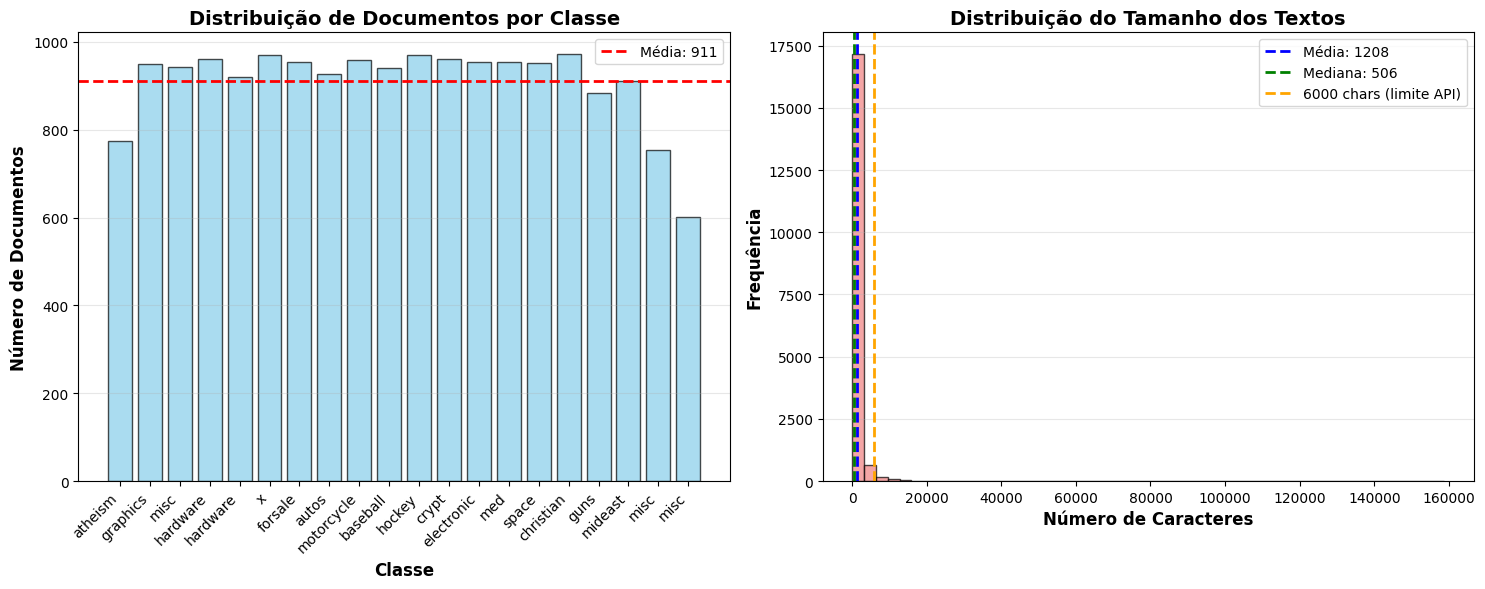


✅ Visualizações geradas com sucesso!


In [26]:
# 📈 Visualizações do Dataset
print("📈 GERANDO VISUALIZAÇÕES DO DATASET")
print("=" * 50)

# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Distribuição de Documentos por Classe
class_counts = df['category'].value_counts().sort_index()
axes[0].bar(range(len(class_counts)), class_counts.values, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Número de Documentos', fontsize=12, fontweight='bold')
axes[0].set_title('Distribuição de Documentos por Classe', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(class_counts)))
axes[0].set_xticklabels([c.split('.')[-1][:10] for c in class_counts.index], 
                        rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Adicionar linha de média
mean_count = class_counts.mean()
axes[0].axhline(y=mean_count, color='red', linestyle='--', linewidth=2, 
               label=f'Média: {mean_count:.0f}')
axes[0].legend()

# Subplot 2: Distribuição do Tamanho dos Textos
text_lengths = df['text'].str.len()
axes[1].hist(text_lengths, bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Número de Caracteres', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequência', fontsize=12, fontweight='bold')
axes[1].set_title('Distribuição do Tamanho dos Textos', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Adicionar linhas verticais para valores importantes
axes[1].axvline(x=text_lengths.mean(), color='blue', linestyle='--', linewidth=2,
               label=f'Média: {text_lengths.mean():.0f}')
axes[1].axvline(x=text_lengths.median(), color='green', linestyle='--', linewidth=2,
               label=f'Mediana: {text_lengths.median():.0f}')
axes[1].axvline(x=6000, color='orange', linestyle='--', linewidth=2,
               label='6000 chars (limite API)')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n✅ Visualizações geradas com sucesso!")


## 📝 Exemplos de Documentos

### **Amostra de Textos por Classe**

Visualizar exemplos reais ajuda a:
- Entender o conteúdo de cada classe
- Avaliar a qualidade do pré-processamento
- Identificar características distintivas


In [27]:
# 📝 Mostrar Exemplos de Textos por Classe
print("📝 EXEMPLOS DE TEXTOS POR CLASSE")
print("=" * 80)

# Mostrar exemplos das 3 primeiras classes
categories_to_show = df['category'].unique()[:3]

for category in categories_to_show:
    print(f"\n🔹 CLASSE: {category}")
    print("-" * 80)
    
    # Pegar um exemplo da classe
    sample = df[df['category'] == category].iloc[0]
    sample_text = sample['text']
    
    # Truncar para visualização se muito longo
    if len(sample_text) > 500:
        sample_text = sample_text[:500] + "..."
    
    print(f"Tamanho: {len(sample['text'])} caracteres")
    print(f"\nTexto:")
    print(sample_text)
    print("-" * 80)

print(f"\n💡 Total de classes: {df['category'].nunique()}")
print(f"💡 Apenas 3 classes mostradas como exemplo")


📝 EXEMPLOS DE TEXTOS POR CLASSE

🔹 CLASSE: rec.sport.hockey
--------------------------------------------------------------------------------
Tamanho: 708 caracteres

Texto:
I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a l...
--------------------------------------------------------------------------------

🔹 CLASSE: comp.sys.ibm.pc.hardware
--------------------------------------------------------------------------------
Tamanho: 323 caracteres

Texto:
My brother is in the market for a high-performance video card that supports
VESA local bus wi

## ✅ Resumo e Próximos Passos

### **O que foi realizado neste notebook:**

1. ✅ **Configuração do ambiente** - Variáveis carregadas do arquivo `setup/.env`
2. ✅ **Sistema de cache** - Elasticsearch inicializado e conectado
3. ✅ **Dataset carregado** - 20 Newsgroups com 10 classes selecionadas
4. ✅ **Dataset salvo** - Armazenado no Elasticsearch com IDs únicos
5. ✅ **Análise exploratória** - Estatísticas detalhadas e visualizações
6. ✅ **Validação** - Dataset balanceado e pronto para uso

### **Variáveis criadas para os próximos notebooks:**

- `df`: DataFrame com colunas ['text', 'category', 'target']
- `doc_ids`: Lista de IDs únicos (doc_0000, doc_0001, ...)
- `CACHE_AVAILABLE`: Flag indicando se o cache está ativo
- Configurações do `.env`: Todas as variáveis de configuração

### **Próximo Notebook: Parte 2 - Embeddings Locais**

No próximo notebook, iremos:

1. **TF-IDF**: Embeddings baseados em frequência de termos
2. **Word2Vec**: Embeddings contextuais clássicos
3. **BERT**: Embeddings bidirecionais modernos
4. **Sentence-BERT**: Otimizado para similaridade de sentenças

Cada tipo de embedding será:
- Gerado com cache inteligente
- Salvo no Elasticsearch
- Analisado em detalhes
- Comparado com os demais


In [28]:
# 📊 Resumo Final
print("📊 RESUMO FINAL - NOTEBOOK 1 COMPLETO")
print("=" * 60)
print(f"✅ Dataset carregado: {len(df):,} documentos")
print(f"✅ Classes: {df['category'].nunique()}")
print(f"✅ IDs únicos: {len(doc_ids):,}")
print(f"✅ Cache Elasticsearch: {'Ativo ✅' if (CACHE_AVAILABLE and cache_connected) else 'Inativo ❌'}")
print(f"\n🎯 Variáveis disponíveis para o próximo notebook:")
print(f"   • df: DataFrame com {len(df):,} documentos")
print(f"   • doc_ids: Lista com {len(doc_ids):,} IDs únicos")
print(f"   • Configurações do .env carregadas")
print(f"\n🚀 Pronto para o Notebook 2: Embeddings Locais!")


📊 RESUMO FINAL - NOTEBOOK 1 COMPLETO
✅ Dataset carregado: 18,211 documentos
✅ Classes: 20
✅ IDs únicos: 18,211
✅ Cache Elasticsearch: Ativo ✅

🎯 Variáveis disponíveis para o próximo notebook:
   • df: DataFrame com 18,211 documentos
   • doc_ids: Lista com 18,211 IDs únicos
   • Configurações do .env carregadas

🚀 Pronto para o Notebook 2: Embeddings Locais!
